<a href="https://colab.research.google.com/github/ChristianEspirituCueva/Measurements_CNN/blob/main/CNN_Measurement_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Clonamos el repositorio donde tenemos los archivos que almacenan nuestros datos
#necesarios
!git clone https://github.com/ChristianEspirituCueva/Files_Masters.git

Cloning into 'Files_Masters'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (206/206), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 206 (delta 20), reused 206 (delta 20), pack-reused 0
Receiving objects: 100% (206/206), 2.26 MiB | 13.44 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [3]:
#Bibliotecas que utilizaremos
import numpy as np 
import cv2
import pandas as pd 
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Concatenate
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import os

In [4]:
#Obtenemos la lista de archivos del directorio train_x y train_y
path_x=os.listdir("Files_Masters/train_x")
path_y=os.listdir("Files_Masters/train_y")

In [5]:
#Obtenemos las rutas de las imagenes, las almacenamos y las ordenamos
path_images_f=["Files_Masters/train_x/"+x for x in path_x if "frontal.png" in x]
path_images_l=["Files_Masters/train_x/"+x for x in path_x if "lateral.png" in x]

path_images_f.sort()
path_images_l.sort()

In [6]:
#Obtenemos las rutas de los 12 primeros .TXT
path_text=[]
for i in range(12):
  if i < 10:
    path_text+=["/content/Files_Masters/train_y/female_000"+str(i)+".txt"]
  else:
    path_text+=["/content/Files_Masters/train_y/female_00"+str(i)+".txt"]

In [7]:
#Obtenemos solos los valores de las 6 primeras medidas encontradas en los .TXT
#Obtenemos la altura del obj 3D
inp_3=[]

out_1=[]
out_2=[]
out_3=[]
out_4=[]
out_5=[]
out_6=[]

#En las listas creadas en lineas anteriores, almancenamos las medidas 
#que obtenemos, y tambíen la altura
for path in path_text:
  with open(path, 'r') as file:
      for line in file:
        if "Seat_Back_Angle" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_1+=[float(aux_2)]
        elif "Outseam" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_2+=[float(aux_2)]
        elif "Inseam" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_3+=[float(aux_2)] 
        elif "CROTCH_H" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_4+=[float(aux_2)] 
        elif "TrouserWAIST_Circ" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_5+=[float(aux_2)] 
        elif "HIP_Circ" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_6+=[float(aux_2)]
        #Este va a ser nuestro otro INPUT la altura
        elif "Head_Top_Height" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          inp_3+=[float(aux_2)]

In [18]:
#Creamos un Data Frame el cual nos ayudará a tener ordenados nuestros datos
#Estos podran servisualizados mucho mejor
df= pd.DataFrame({'Path-Frontal':path_images_f,
                  'Path-Lateral':path_images_l,
                  'Height':inp_3,
                  'SeatBackAngle':out_1,
                  'Outseam':out_2,
                  'Inseam':out_3,
                  'Crotch':out_4,
                  'TrouserWaist':out_5,
                  'HipCirc':out_6})

In [9]:
#Guardamos un copia del Data Frame
df_v1=df.copy()
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,162.6,18.7,99.2,78.9,78.0,84.4,94.2
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,159.0,19.6,89.5,71.7,70.6,83.7,99.3
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,169.6,18.3,106.5,81.3,80.2,95.3,107.9
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,20.1,99.1,77.4,76.0,81.5,89.3
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,153.0,13.0,92.3,72.6,71.5,97.2,100.3
5,Files_Masters/train_x/female_0005_frontal.png,Files_Masters/train_x/female_0005_lateral.png,177.1,16.5,114.7,91.0,90.1,85.7,97.7
6,Files_Masters/train_x/female_0006_frontal.png,Files_Masters/train_x/female_0006_lateral.png,155.4,20.1,95.6,72.8,71.3,87.0,98.2
7,Files_Masters/train_x/female_0007_frontal.png,Files_Masters/train_x/female_0007_lateral.png,151.7,7.9,85.6,67.3,65.8,100.1,100.9
8,Files_Masters/train_x/female_0008_frontal.png,Files_Masters/train_x/female_0008_lateral.png,160.8,18.4,99.4,78.1,77.0,84.1,96.1
9,Files_Masters/train_x/female_0009_frontal.png,Files_Masters/train_x/female_0009_lateral.png,165.5,18.2,103.1,82.0,80.8,88.2,97.6


In [19]:
#En un nuevo Data Frame guardamos solo las medidas
#Esto para poder obtener la media y su desviación estandar de cada columna
height_df=df[['Height']]

In [20]:
height_df

,Height
0,162.6
1,159.0
2,169.6
3,163.5
4,153.0
5,177.1
6,155.4
7,151.7
8,160.8
9,165.5


In [21]:
#Obtenemos la media de cada columna
means = [height_df[col].mean() for col in height_df]
#Obtenemos la desviación estandar de cada columna
std_dv = [height_df[col].std() for col in height_df]

In [22]:
#Cambiamos los valores del Data Frame (df)
df.iloc[:,[2]]=(df.iloc[:,[2]]-means[0])/std_dv[0]

In [23]:
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,0.206032,18.7,99.2,78.9,78.0,84.4,94.2
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,-0.291207,19.6,89.5,71.7,70.6,83.7,99.3
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,1.172887,18.3,106.5,81.3,80.2,95.3,107.9
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,0.330342,20.1,99.1,77.4,76.0,81.5,89.3
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,-1.119940,13.0,92.3,72.6,71.5,97.2,100.3
5,Files_Masters/train_x/female_0005_frontal.png,Files_Masters/train_x/female_0005_lateral.png,2.208802,16.5,114.7,91.0,90.1,85.7,97.7
6,Files_Masters/train_x/female_0006_frontal.png,Files_Masters/train_x/female_0006_lateral.png,-0.788447,20.1,95.6,72.8,71.3,87.0,98.2
7,Files_Masters/train_x/female_0007_frontal.png,Files_Masters/train_x/female_0007_lateral.png,-1.299499,7.9,85.6,67.3,65.8,100.1,100.9
8,Files_Masters/train_x/female_0008_frontal.png,Files_Masters/train_x/female_0008_lateral.png,-0.042588,18.4,99.4,78.1,77.0,84.1,96.1
9,Files_Masters/train_x/female_0009_frontal.png,Files_Masters/train_x/female_0009_lateral.png,0.606586,18.2,103.1,82.0,80.8,88.2,97.6


In [24]:
#Crearemos archivos .npz con la finalidad de guardar datos escenciales como
#Las imagenes frontales, laterales, las medidas y la altura de cada fila del
#Dataframe obtenido.
#Al final tendremos la misma cantidad de archivos .npz que numero de columnas   
npz_paths=[]

#Recorremos cada fila de nuestro dataframe
for i, row in df.iterrows():
  img_path_f=row['Path-Frontal']

  #Creamos el archivo .npz que contendra las imagenes, medidas y la altura 
  npz_path=img_path_f.split('.')[0]+'.npz'
  npz_paths.append(npz_path)

  #La imagen frontal, la convertimos a RGB y hacemos un reescalamiento
  #de sus dimensiones
  img_bgr_arr_f = cv2.imread(img_path_f)
  img_rgb_arr_f = cv2.cvtColor(img_bgr_arr_f, cv2.COLOR_BGR2RGB)   
  img_rgb_arr_f=cv2.resize(img_rgb_arr_f, (256,256))
  
  #La imagen lateral, la convertimos a RGB y hacemos un reescalamiento
  #de sus dimensiones
  img_path_l=row['Path-Lateral']

  img_bgr_arr_l = cv2.imread(img_path_l)
  img_rgb_arr_l = cv2.cvtColor(img_bgr_arr_l, cv2.COLOR_BGR2RGB)
  img_rgb_arr_l=cv2.resize(img_rgb_arr_l, (256,256))
  
  #Obtenemos los valores de las medidas por la fila donde se encuentra el "for"
  seatBackAngle=row['SeatBackAngle'] 
  outseam=row['Outseam']
  inseam=row['Inseam']
  crotch=row['Crotch']
  trouserWaist=row['TrouserWaist']
  hipCirc=row['HipCirc']
  #Obtenemos los valores de la altura por la fila donde se encuentra el "for"
  height = row['Height']
  
  #Le inputamos los valores de los datos que necesitamos al archivo npz 
  #como si fuera un diccionario
  np.savez_compressed(npz_path, 
                      img_f=img_rgb_arr_f, img_l=img_rgb_arr_l,height=height,
                      seatBackAngle=seatBackAngle,outseam=outseam,
                      inseam=inseam,crotch=crotch,trouserWaist=trouserWaist,
                      hipCirc=hipCirc)

#Creamos una nueva columna NPZ_Path en el Data Frame(df)
df['NPZ_Path']=pd.Series(npz_paths)
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc,NPZ_Path
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,0.206032,18.7,99.2,78.9,78.0,84.4,94.2,Files_Masters/train_x/female_0000_frontal.npz
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,-0.291207,19.6,89.5,71.7,70.6,83.7,99.3,Files_Masters/train_x/female_0001_frontal.npz
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,1.172887,18.3,106.5,81.3,80.2,95.3,107.9,Files_Masters/train_x/female_0002_frontal.npz
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,0.330342,20.1,99.1,77.4,76.0,81.5,89.3,Files_Masters/train_x/female_0003_frontal.npz
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,-1.119940,13.0,92.3,72.6,71.5,97.2,100.3,Files_Masters/train_x/female_0004_frontal.npz
5,Files_Masters/train_x/female_0005_frontal.png,Files_Masters/train_x/female_0005_lateral.png,2.208802,16.5,114.7,91.0,90.1,85.7,97.7,Files_Masters/train_x/female_0005_frontal.npz
6,Files_Masters/train_x/female_0006_frontal.png,Files_Masters/train_x/female_0006_lateral.png,-0.788447,20.1,95.6,72.8,71.3,87.0,98.2,Files_Masters/train_x/female_0006_frontal.npz
7,Files_Masters/train_x/female_0007_frontal.png,Files_Masters/train_x/female_0007_lateral.png,-1.299499,7.9,85.6,67.3,65.8,100.1,100.9,Files_Masters/train_x/female_0007_frontal.npz
8,Files_Masters/train_x/female_0008_frontal.png,Files_Masters/train_x/female_0008_lateral.png,-0.042588,18.4,99.4,78.1,77.0,84.1,96.1,Files_Masters/train_x/female_0008_frontal.npz
9,Files_Masters/train_x/female_0009_frontal.png,Files_Masters/train_x/female_0009_lateral.png,0.606586,18.2,103.1,82.0,80.8,88.2,97.6,Files_Masters/train_x/female_0009_frontal.npz


In [ ]:
#Veremos un ejemplo de como se utiliza este tipo de archivos .npz 
#que nos proporciona NUMPY
sample=np.load('Files_Masters/train_x/female_0000_frontal.npz')
sample['img_l'].shape,sample['img_f'].shape

((256, 256, 3), (256, 256, 3))

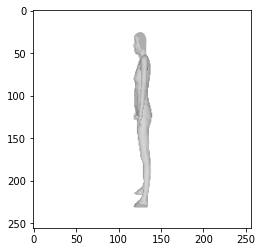

In [ ]:
#Mostramos la imagen lateral contenida en el archivo .npz
plt.imshow(sample['img_l'])

In [25]:
#Ahora que el df contiene la ruta del archivo .npz no es necesario
#Tener la ruta de las imagenes en el Data Frame (df)
df.drop(['Path-Frontal','Path-Lateral'], inplace=True, axis=1)

In [26]:
df

,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc,NPZ_Path
0,0.206032,18.7,99.2,78.9,78.0,84.4,94.2,Files_Masters/train_x/female_0000_frontal.npz
1,-0.291207,19.6,89.5,71.7,70.6,83.7,99.3,Files_Masters/train_x/female_0001_frontal.npz
2,1.172887,18.3,106.5,81.3,80.2,95.3,107.9,Files_Masters/train_x/female_0002_frontal.npz
3,0.330342,20.1,99.1,77.4,76.0,81.5,89.3,Files_Masters/train_x/female_0003_frontal.npz
4,-1.119940,13.0,92.3,72.6,71.5,97.2,100.3,Files_Masters/train_x/female_0004_frontal.npz
5,2.208802,16.5,114.7,91.0,90.1,85.7,97.7,Files_Masters/train_x/female_0005_frontal.npz
6,-0.788447,20.1,95.6,72.8,71.3,87.0,98.2,Files_Masters/train_x/female_0006_frontal.npz
7,-1.299499,7.9,85.6,67.3,65.8,100.1,100.9,Files_Masters/train_x/female_0007_frontal.npz
8,-0.042588,18.4,99.4,78.1,77.0,84.1,96.1,Files_Masters/train_x/female_0008_frontal.npz
9,0.606586,18.2,103.1,82.0,80.8,88.2,97.6,Files_Masters/train_x/female_0009_frontal.npz


In [27]:
#Hacemos un barajeo de los datos que tenemos hasta ahora
#Esto con la finalidad de tener los datos de entrenamiento
#Y los datos de validación
shuffled_df = df.sample(frac=1)
train_df, val_df, test_df=shuffled_df[:8],shuffled_df[8:11],shuffled_df[11:]

In [28]:
#Creamos una función que nos retornará  los datos que nos servirán como input
#Y los datos que nos servirán como output, todo esto contenido en un array np
def get_x_y(df):
  x1,x2,x3=[],[],[]
  y1,y2,y3,y4,y5,y6=[],[],[],[],[],[]

  for name in df['NPZ_Path']:
    loaded_npz = np.load(name)

    img1 = loaded_npz['img_f']
    x1.append(img1)
    img2 = loaded_npz['img_l']
    x2.append(img2)
    i_3 = loaded_npz['height']
    x3.append(i_3)

    y1.append(loaded_npz['seatBackAngle'])
    y2.append(loaded_npz['outseam'])
    y3.append(loaded_npz['inseam'])
    y4.append(loaded_npz['crotch'])
    y5.append(loaded_npz['trouserWaist'])
    y6.append(loaded_npz['hipCirc'])


  x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)
  y1,y2,y3,y4,y5,y6=np.array(y1),np.array(y2),np.array(y3),np.array(y4),np.array(y5),np.array(y6)
  return (x1,x2,x3), (y1,y2,y3,y4,y5,y6)


In [29]:
#Obtenemos los datos de entrenamiento en el formato correcto para entrenar el modelo
(x1_train,x2_train,x3_train),(y1_train,y2_train,y3_train,y4_train,y5_train,y6_train)=get_x_y(train_df)
(x1_train.shape,x2_train.shape,x3_train.shape),(y1_train.shape,y2_train.shape,y3_train.shape,y4_train.shape,y5_train.shape,y6_train.shape)

(((8, 256, 256, 3), (8, 256, 256, 3), (8,)),
 ((8,), (8,), (8,), (8,), (8,), (8,)))

In [30]:
#Obtenemos los datos de validación en el formato correcto para validar el entrenamiento el modelo
(x1_val,x2_val,x3_val),(y1_val,y2_val,y3_val,y4_val,y5_val,y6_val)=get_x_y(val_df)
(x1_val.shape,x2_val.shape,x3_val.shape),(y1_val.shape,y2_val.shape,y3_val.shape,y4_val.shape,y5_val.shape,y6_val.shape)

(((3, 256, 256, 3), (3, 256, 256, 3), (3,)),
 ((3,), (3,), (3,), (3,), (3,), (3,)))

In [31]:
#Obtenemos los datos de testeo en el formato correcto para probarlos en el modelo entrenado
(x1_test,x2_test,x3_test),(y1_test,y2_test,y3_test,y4_test,y5_test,y6_test)=get_x_y(test_df)
(x1_test.shape,x2_test.shape,x3_test.shape),(y1_test.shape,y2_test.shape,y3_test.shape,y4_test.shape,y5_test.shape,y6_test.shape)

(((1, 256, 256, 3), (1, 256, 256, 3), (1,)),
 ((1,), (1,), (1,), (1,), (1,), (1,)))

##Creación del modelo CNN

In [32]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers.convolutional import Conv2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#Part.1 of the model - CNN
input_img1=layers.Input(shape=(256,256,3))
x_1       =layers.Lambda(preprocess_input)(input_img1)
x_1       =MobileNetV2(input_shape=(256,256,3),include_top=False)(x_1)
x_1       =layers.GlobalAveragePooling2D()(x_1)
x_1       =layers.Dense(10, activation='relu')(x_1)
x_1       =Model(inputs=input_img1, outputs=x_1, name='img_f')

input_img2=layers.Input(shape=(256,256,3))
x_2       =layers.Lambda(preprocess_input)(input_img2)
x_2       =Conv2D(32,(3,3), padding="same")(x_2)
x_2       =layers.GlobalAveragePooling2D()(x_2)
x_2       =layers.Dense(10, activation='relu')(x_2)
x_2       =Model(inputs=input_img2, outputs=x_2,name='img_l')

#Part.2 of the model - Feed-Forward
input_i_3=layers.Input(shape=(1,))
x_3      =layers.Dense(16, activation='relu')(input_i_3)
x_3      =layers.Dense(10, activation='relu')(x_3)
x_3      =Model(inputs=input_i_3, outputs=x_3)

#Part.3 Concatenate
combine=layers.concatenate([x_1.output,x_2.output,x_3.output])
c1=layers.Dense(10, activation='relu')(combine)

y_1 = layers.Dense(32, activation='relu')(c1)
y_1 = layers.Dense(16, activation='relu')(y_1)
y_1 = layers.Dense(8, activation='relu',name='output_T_H_B')(y_1)

y_2 = layers.Dense(32, activation='relu')(c1)
y_2 = layers.Dense(16, activation='relu')(y_2)
y_2 = layers.Dense(8, activation='relu',name='output_CL_B')(y_2)

y_3 = layers.Dense(32, activation='relu')(c1)
y_3 = layers.Dense(16, activation='relu')(y_3)
y_3 = layers.Dense(8, activation='relu',name='output_CL_F')(y_3)

y_4 = layers.Dense(32, activation='relu')(c1)
y_4 = layers.Dense(16, activation='relu')(y_4)
y_4 = layers.Dense(8, activation='relu',name='output_A_C')(y_4)

y_5 = layers.Dense(32, activation='relu')(c1)
y_5 = layers.Dense(16, activation='relu')(y_5)
y_5 = layers.Dense(8, activation='relu',name='output_H_T_H')(y_5)

y_6 = layers.Dense(32, activation='relu')(c1)
y_6 = layers.Dense(16, activation='relu')(y_6)
y_6 = layers.Dense(8, activation='relu',name='output_H_H')(y_6)

model = Model(inputs=[x_1.input,x_2.input,x_3.input], outputs=[y_1,y_2,y_3,y_4,y_5,y_6])

9420800/9406464 [==============================] - 0s 0us/step


In [33]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                            

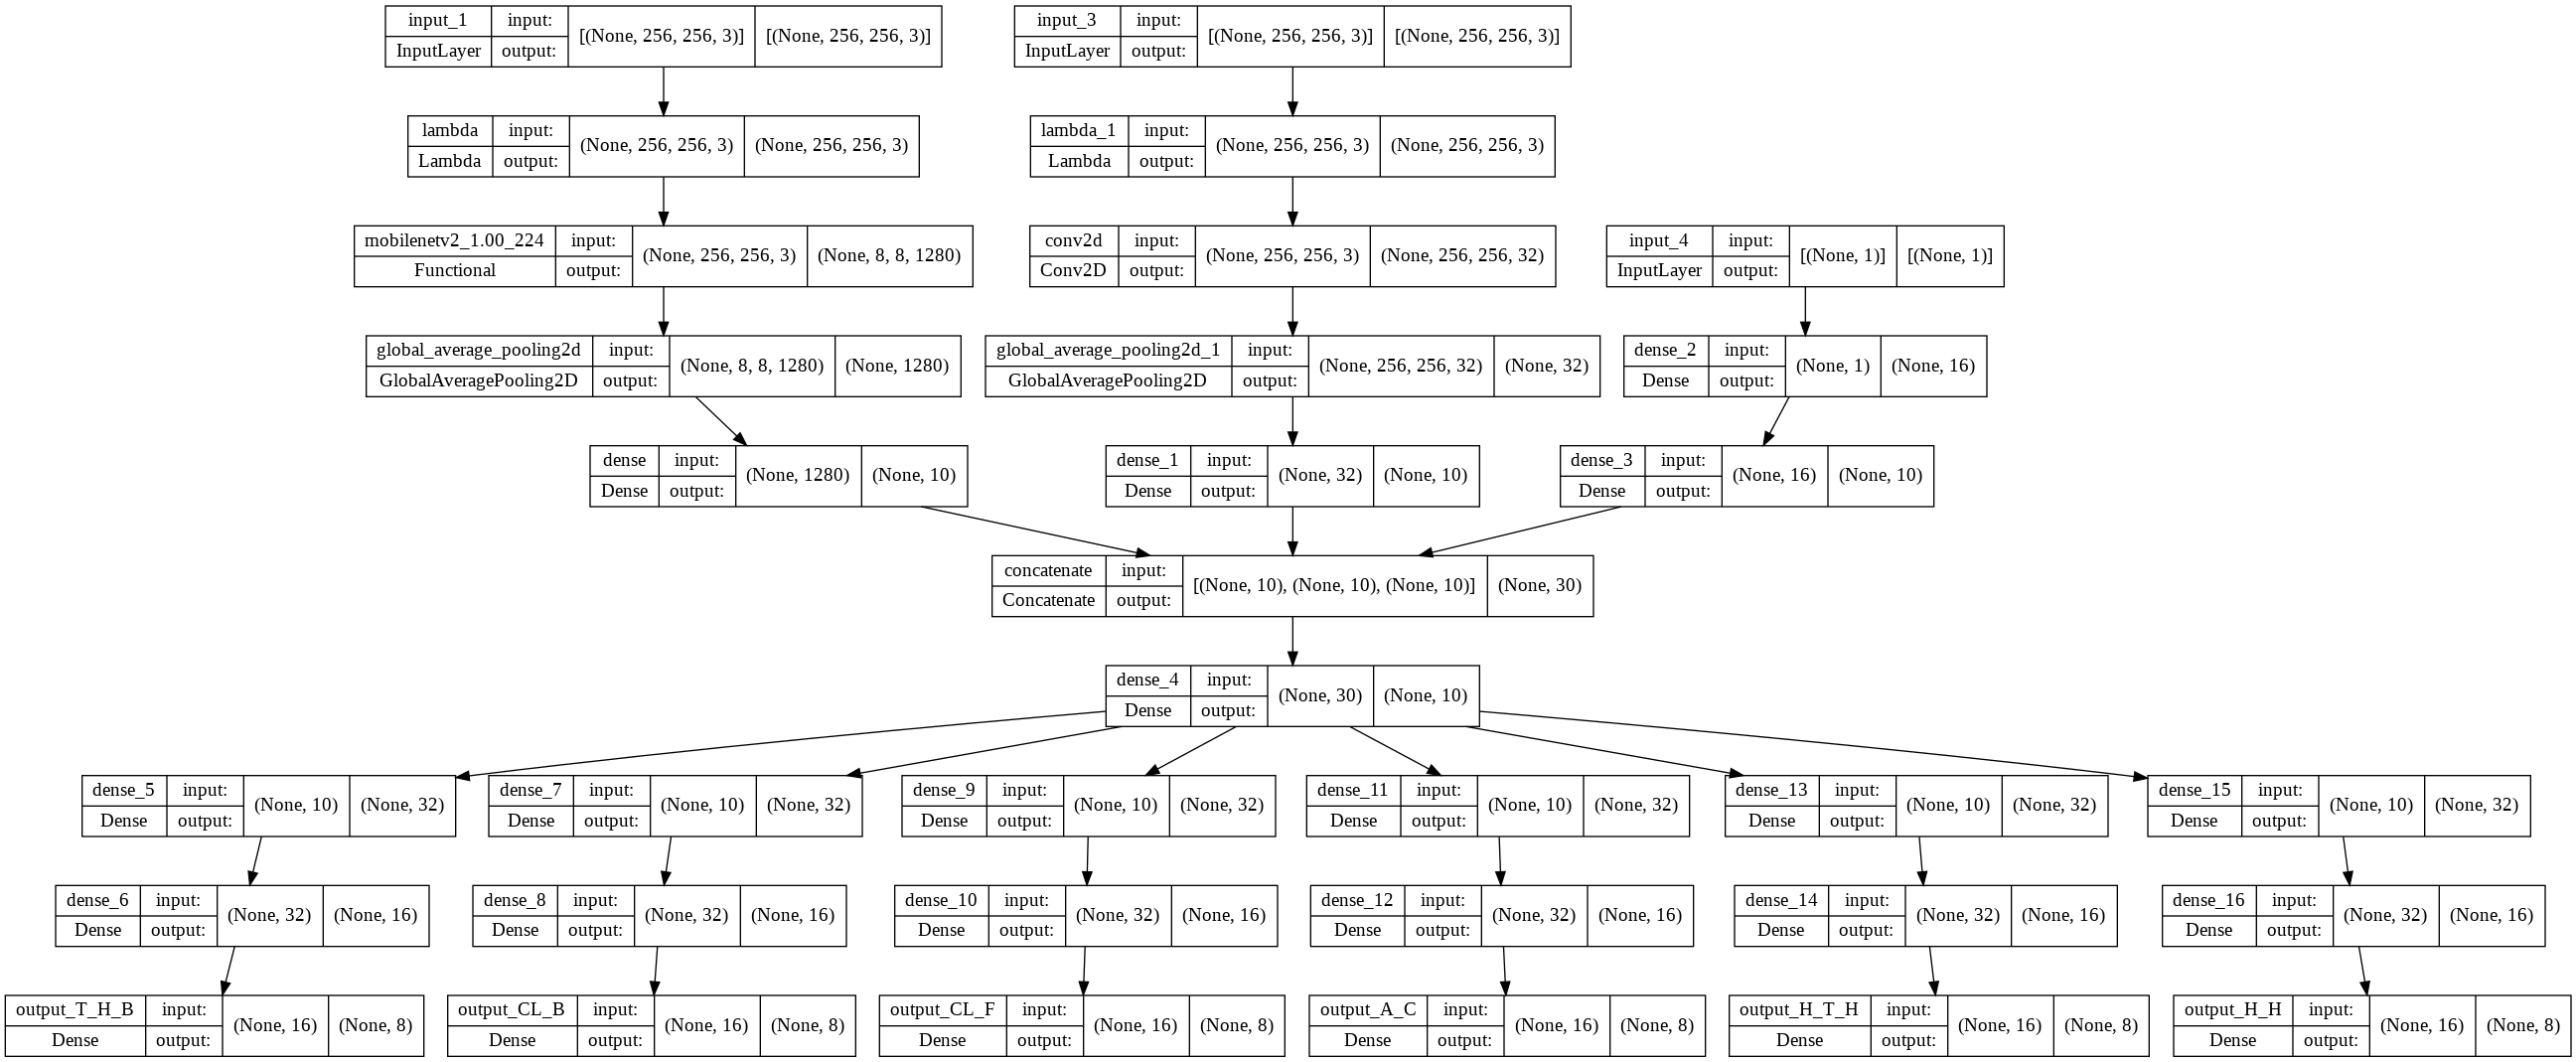

In [34]:
# Mostramos la arquitectura del modelo
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

In [35]:
#Configuramos nuestro modelo para que aplique la función de optimización
#Adam y muestre los valores de perdida, perdidad de pesos y metricas que 
#los outputs obtuvieron 
from tensorflow.keras.optimizers import Adam
init_lr = 1e-4
epochs = 100
opt = Adam(lr=init_lr, decay=init_lr / epochs)
model.compile(optimizer=opt, 
              loss={
                  'output_T_H_B': 'binary_crossentropy', 
                  'output_CL_B': 'binary_crossentropy', 
                  'output_CL_F': 'binary_crossentropy',
                  'output_A_C': 'binary_crossentropy',
                  'output_H_T_H':'binary_crossentropy',
                  'output_H_H':'binary_crossentropy'},
              loss_weights={
                  'output_T_H_B': 4., 
                  'output_CL_B': 1.5, 
                  'output_CL_F': 0.1,
                  'output_A_C': 4.,
                  'output_H_T_H':1.5,
                  'output_H_H':0.1},
              metrics={
                  'output_T_H_B': 'accuracy', 
                  'output_CL_B': 'accuracy', 
                  'output_CL_F': 'accuracy',
                  'output_A_C': 'accuracy',
                  'output_H_T_H':'accuracy',
                  'output_H_H':'accuracy'})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
#Utilizamos ModelCheckpoint para guardar nuestro modelo 
#despues de su entrenamiento
from tensorflow.keras.callbacks import ModelCheckpoint
cp=ModelCheckpoint('model/',save_best_only=True)

#Entrenamos nuestro modelo CNN
model.fit(x=[x1_train,x2_train,x3_train],
          y=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train],
          validation_data=([x1_val,x2_val,x3_val],
                           [y1_val,y2_val,y3_val,y4_val,y5_val,y6_val]),
          epochs=10,
          callbacks=[cp])

Epoch 1/10
1/1 [==============================] - 60s 60s/step - loss: 6126.8750 - output_T_H_B_loss: 121.3819 - output_CL_B_loss: 536.7390 - output_CL_F_loss: 635.5303 - output_A_C_loss: 818.7261 - output_H_T_H_loss: 916.1343 - output_H_H_loss: 1235.8052 - output_T_H_B_accuracy: 0.0000e+00 - output_CL_B_accuracy: 0.0000e+00 - output_CL_F_accuracy: 0.0000e+00 - output_A_C_accuracy: 0.0000e+00 - output_H_T_H_accuracy: 0.0000e+00 - output_H_H_accuracy: 0.0000e+00 - val_loss: 6952.4478 - val_output_T_H_B_loss: 192.3093 - val_output_CL_B_loss: 673.3135 - val_output_CL_F_loss: 776.4670 - val_output_A_C_loss: 901.7487 - val_output_H_T_H_loss: 915.1108 - val_output_H_H_loss: 1159.3265 - val_output_T_H_B_accuracy: 0.0000e+00 - val_output_CL_B_accuracy: 0.0000e+00 - val_output_CL_F_accuracy: 0.0000e+00 - val_output_A_C_accuracy: 0.0000e+00 - val_output_H_T_H_accuracy: 0.0000e+00 - val_output_H_H_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 31s 31s/step - loss: 6024.370

In [37]:
from tensorflow.keras.models import load_model

loaded_model = load_model('model/')

In [39]:
test_predict=loaded_model.predict([x1_test,x2_test,x3_test])